<a href="https://colab.research.google.com/github/jithemji/Like_Prediction_Model/blob/main/Audio/feature_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('/content/drive/MyDrive/video content analysis/data.csv')

In [5]:
df.head()

,Unnamed: 0,spec_bw_mean,spec_bw_med,spec_bw_std,spec_bw_max,spec_bw_min,spec_rolloff_mean,spec_rolloff_med,spec_rolloff_std,spec_rolloff_max,spec_rolloff_min,spec_cent_mean,spec_cent_med,spec_cent_std,spec_cent_max,spec_cent_min,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,mfcc10_mean,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,mfcc1_med,mfcc2_med,mfcc3_med,mfcc4_med,...,chr4_std,chr5_std,chr6_std,chr7_std,chr8_std,chr9_std,chr10_std,chr11_std,chr12_std,chr1_max,chr2_max,chr3_max,chr4_max,chr5_max,chr6_max,chr7_max,chr8_max,chr9_max,chr10_max,chr11_max,chr12_max,chr1_min,chr2_min,chr3_min,chr4_min,chr5_min,chr6_min,chr7_min,chr8_min,chr9_min,chr10_min,chr11_min,chr12_min,zcrr_mean,zcrr_med,zcrr_std,zcrr_max,zcrr_min,zcr,views
0,1,2030.179674,1959.794710,767.787559,4030.921517,0.0,3525.032766,2530.151367,2676.325996,9808.374023,0.0,1774.638080,1259.221313,1358.294604,7224.937542,0.0,-311.057678,94.171326,34.061352,29.690777,11.202586,-3.855678,-14.581732,-7.805006,-11.418423,-4.223622,-10.954490,-4.522069,-10.953578,-11.617891,-7.339822,-7.037759,-12.195661,-8.960283,-8.032277,-4.617074,-302.867523,99.676758,33.680344,27.779488,...,0.313277,0.304166,0.284614,0.283951,0.310423,0.312458,0.356056,0.327770,0.311138,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085045,0,0,0,0,2227741,8851
1,2,1967.731461,1845.441185,770.644383,4083.123843,0.0,3401.332634,2519.384766,2615.419731,9969.873047,0.0,1718.093009,1187.677272,1352.818225,7398.308626,0.0,-361.651764,91.266083,32.434723,34.830757,11.771287,-8.585844,-8.699321,-8.397955,-10.665344,-2.073390,-9.737555,-2.214098,-9.429249,-11.337292,-6.260693,-6.980236,-11.093098,-7.290222,-8.240770,-6.332847,-356.499817,97.972839,31.938801,30.880535,...,0.306892,0.297565,0.284198,0.274651,0.309688,0.310720,0.358056,0.345166,0.339502,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083942,0,0,0,0,3999863,9309
2,3,2044.636279,1982.546630,729.270852,4007.884699,0.0,3568.594847,2670.117188,2577.664876,9819.140625,0.0,1802.686516,1324.612270,1365.368198,7236.673217,0.0,-347.294312,86.350319,31.360334,27.287346,9.481331,-3.302117,-13.474671,-5.922333,-8.130700,-2.624264,-10.443044,-4.017173,-11.584930,-11.529947,-4.872400,-7.373795,-12.066875,-7.782693,-6.797484,-4.689390,-343.298096,90.184151,30.702362,26.429190,...,0.322622,0.305208,0.294705,0.292014,0.323169,0.326954,0.359934,0.350636,0.332649,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086255,0,0,0,0,4987522,7308
3,4,1959.562193,1813.899556,702.683395,3817.752630,0.0,3520.755915,2745.483398,2412.516224,9754.541016,0.0,1786.806745,1311.626942,1270.340341,7162.829820,0.0,-235.007584,93.845879,19.240696,37.409462,8.292507,-6.540430,-11.751071,-9.049055,-14.196241,-1.067007,-10.400985,-1.162823,-5.652502,-9.449134,-6.270150,-6.208694,-11.589703,-4.522139,-5.999825,-6.438097,-219.741196,105.073891,23.469452,32.754745,...,0.311734,0.309946,0.306484,0.333297,0.355568,0.327954,0.341778,0.330263,0.332495,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089454,0,0,0,0,2594549,4099
4,5,2154.297542,2206.503147,712.111477,3984.520622,0.0,4075.635357,4177.441406,2530.993395,9894.506836,0.0,2025.634398,1786.966229,1347.233446,7493.963012,0.0,-320.463348,74.869011,30.760990,42.097054,8.144476,-4.258576,-4.178467,-10.357195,-9.733069,-2.317397,-9.527082,-0.947373,-8.525039,-11.315473,-7.922903,-6.040540,-10.546000,-5.438093,-7.231313,-6.406849,-323.665558,71.068001,28.088217,36.023403,...,0.297025,0.293111,0.277619,0.290562,0.311952,0.281808,0.313635,0.308084,0.349771,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095819,0,0,0,0,3507443,2812


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Columns: 183 entries, Unnamed: 0 to views
dtypes: float64(164), int64(19)
memory usage: 11.6 KB


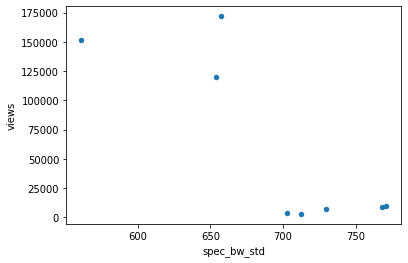

In [7]:
df.plot.scatter(x='spec_bw_std',y='views')

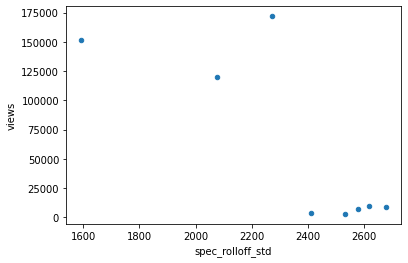

In [8]:
df.plot.scatter(x='spec_rolloff_std',y='views')

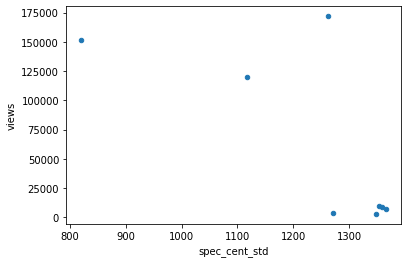

In [9]:
df.plot.scatter(x='spec_cent_std',y='views')

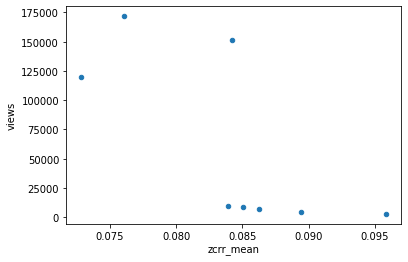

In [11]:
df.plot.scatter(x='zcrr_mean',y='views')

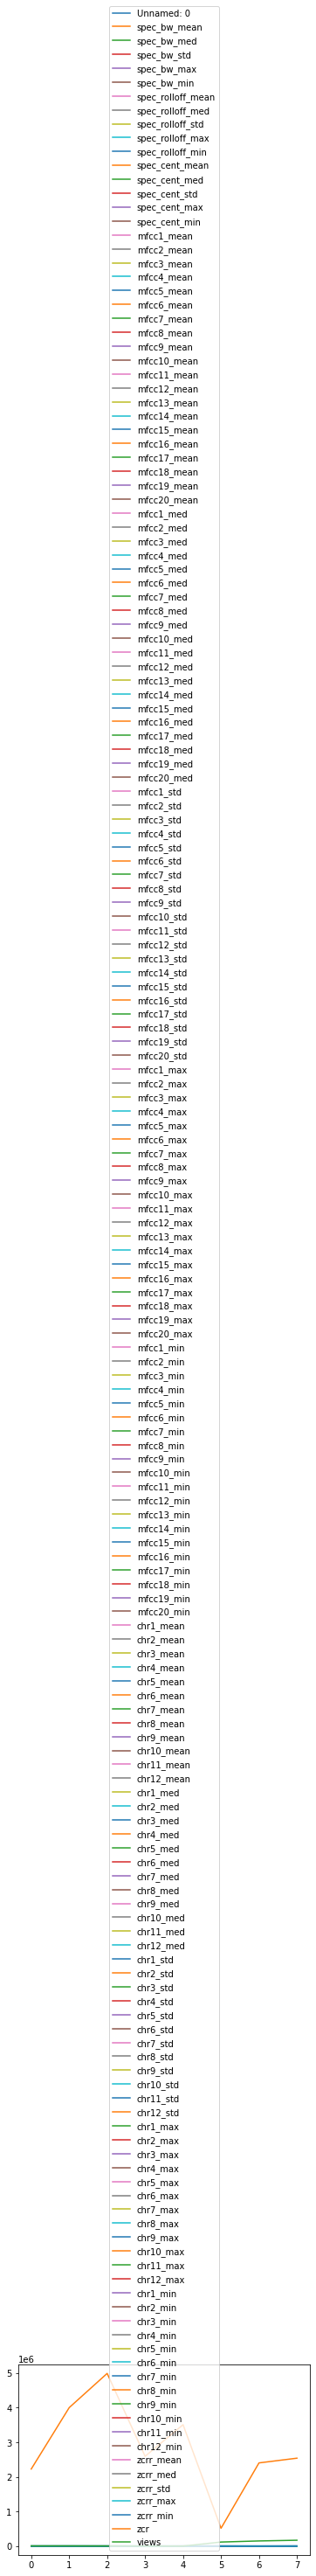

In [14]:
df.plot.line()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
